In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
pip install citipy


Note: you may need to restart the kernel to use updated packages.


In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

georgetown sh
norman wells ca
port elizabeth za
aden ye
belushya guba ru
pacific grove us
taoudenni ml
hermanus za
cabo san lucas mx
kaitangata nz
chokurdakh ru
caravelas br
port elizabeth za
sao filipe cv
luderitz na
marawi sd
talnakh ru
vaini to
dikson ru
tuktoyaktuk ca
taolanaro mg
bandarbeyla so
thompson ca
vaitupu wf
busselton au
port-gentil ga
rikitea pf
sibolga id
golyshmanovo ru
upernavik gl
punta arenas cl
kloulklubed pw
bluff nz
ballinasloe ie
amapa br
arraial do cabo br
barrow us
avarua ck
klaksvik fo
zhigansk ru
pak phanang th
port macquarie au
provideniya ru
mataura pf
aklavik ca
aswan eg
ilulissat gl
hami cn
vila vu
ribeira grande pt
glyadyanskoye ru
busselton au
cherskiy ru
grand river south east mu
puerto ayora ec
namwala zm
tuktoyaktuk ca
punta arenas cl
victoria sc
rikitea pf
nouadhibou mr
saint-augustin ca
tsihombe mg
bengkulu id
barrow us
ushuaia ar
vaini to
morant bay jm
port alfred za
bahia blanca ar
kharp ru
taolanaro mg
lagoa pt
pimentel pe
bambous virieux mu
ri

georgetown sh
yellowknife ca
albany au
san jose gt
taolanaro mg
new norfolk au
jamestown sh
albany au
artyom az
hermanus za
punta arenas cl
palabuhanratu id
avarua ck
nizhneyansk ru
rikitea pf
mabaruma gy
marawi sd
barrow us
samarai pg
hermanus za
port alfred za
rikitea pf
mataura pf
port alfred za
bethel us
clifton us
maldonado uy
praia da vitoria pt
atuona pf
port hardy ca
ushuaia ar
ambon id
pochutla mx
ponta do sol cv
norrtalje se
rikitea pf
castro cl
rawson ar
tuatapere nz
lebu cl
goundam ml
orsha by
provideniya ru
torbay ca
sayat tm
cabo san lucas mx
thompson ca
illoqqortoormiut gl
avarua ck
hervey bay au
tahoua ne
lasa cn
matagami ca
san joaquin bo
chimbarongo cl
punta arenas cl
ponta do sol cv
tsihombe mg
haukipudas fi
barrow us
panzhihua cn
busselton au
longyearbyen sj
bengkulu id
awjilah ly
pokhara np
falealupo ws
atuona pf
punta arenas cl
touba ci
silos co
eydhafushi mv
cape town za
jalu ly
bredasdorp za
atambua id
danielskuil za
villa constitucion ar
mahibadhoo mv
kapaa us


beringovskiy ru
rikitea pf
prince albert ca
cape town za
ushuaia ar
airai pw
butaritari ki
illoqqortoormiut gl
tuktoyaktuk ca
qui nhon vn
pangody ru
mar del plata ar
necochea ar
new norfolk au
taolanaro mg
mogadishu so
tasiilaq gl
lebu cl
buraydah sa
bahile ph
willowmore za
barentsburg sj
sao domingos br
bluff nz
barrow us
cherskiy ru
fortuna us
victoria sc
mount gambier au
nishihara jp
yar-sale ru
moranbah au
golpayegan ir
busselton au
punta arenas cl
ushuaia ar
asau tv
barrow us
kavieng pg
alofi nu
busselton au
ust-nera ru
alofi nu
busselton au
ancud cl
bluff nz
huarmey pe
bethel us
pevek ru
mar del plata ar
gilgit pk
puerto ayora ec
paamiut gl
ushuaia ar
tuktoyaktuk ca
yellowknife ca
busselton au
inhambane mz
guerrero negro mx
iqaluit ca
busselton au
port-cartier ca
butaritari ki
erzin ru
taolanaro mg
hilo us
faya td
east london za
rio grande br
severo-kurilsk ru
cape town za
saldanha za
saposoa pe
ushuaia ar
aquidauana br
yantal ru
qaanaaq gl
krasnorechenskiy ru
rikitea pf
hovd mn


In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [11]:
import requests
requests.__version__

'2.25.1'

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key



In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds, 
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate the Data Loading is complete.
print("----------------------------")
print("Data Retrieval Complete     ")
print("----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | georgetown
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | aden
Processing Record 5 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 6 of Set 1 | pacific grove
Processing Record 7 of Set 1 | taoudenni
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | cabo san lucas
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | caravelas
Processing Record 13 of Set 1 | sao filipe
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | marawi
Processing Record 16 of Set 1 | talnakh
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | bandarbeyla
P

Processing Record 39 of Set 4 | yulara
Processing Record 40 of Set 4 | bandar-e lengeh
Processing Record 41 of Set 4 | najran
Processing Record 42 of Set 4 | asau
Processing Record 43 of Set 4 | dinsor
City not found. Skipping...
Processing Record 44 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 45 of Set 4 | la ronge
Processing Record 46 of Set 4 | berlevag
Processing Record 47 of Set 4 | mukhen
Processing Record 48 of Set 4 | alta floresta
Processing Record 49 of Set 4 | kaura namoda
Processing Record 50 of Set 4 | erdenet
Processing Record 1 of Set 5 | boca do acre
Processing Record 2 of Set 5 | atar
Processing Record 3 of Set 5 | kibala
Processing Record 4 of Set 5 | kenai
Processing Record 5 of Set 5 | chuy
Processing Record 6 of Set 5 | mumford
Processing Record 7 of Set 5 | husavik
Processing Record 8 of Set 5 | kavieng
Processing Record 9 of Set 5 | tartagal
Processing Record 10 of Set 5 | bonavista
Processing Record 11 of Set 5 | russell
Processing Record 

Processing Record 30 of Set 8 | charyshskoye
Processing Record 31 of Set 8 | edd
Processing Record 32 of Set 8 | winnemucca
Processing Record 33 of Set 8 | manakara
Processing Record 34 of Set 8 | imeni poliny osipenko
Processing Record 35 of Set 8 | xiamen
Processing Record 36 of Set 8 | maniitsoq
Processing Record 37 of Set 8 | sept-iles
Processing Record 38 of Set 8 | dicabisagan
Processing Record 39 of Set 8 | gaimersheim
Processing Record 40 of Set 8 | veraval
Processing Record 41 of Set 8 | ust-koksa
Processing Record 42 of Set 8 | lixourion
Processing Record 43 of Set 8 | aasiaat
Processing Record 44 of Set 8 | sherman
Processing Record 45 of Set 8 | matamoros
Processing Record 46 of Set 8 | ziway
Processing Record 47 of Set 8 | tome
Processing Record 48 of Set 8 | malwan
City not found. Skipping...
Processing Record 49 of Set 8 | gayny
Processing Record 50 of Set 8 | vilhena
Processing Record 1 of Set 9 | castelu
Processing Record 2 of Set 9 | pudozh
Processing Record 3 of Set 

Processing Record 16 of Set 12 | trelew
Processing Record 17 of Set 12 | maxixe
Processing Record 18 of Set 12 | bemidji
Processing Record 19 of Set 12 | vredendal
Processing Record 20 of Set 12 | storforshei
Processing Record 21 of Set 12 | pouebo
Processing Record 22 of Set 12 | sandnessjoen
Processing Record 23 of Set 12 | san ramon
Processing Record 24 of Set 12 | tubigan
Processing Record 25 of Set 12 | qui nhon
Processing Record 26 of Set 12 | emerald
Processing Record 27 of Set 12 | abu zabad
Processing Record 28 of Set 12 | turayf
Processing Record 29 of Set 12 | kholmogory
Processing Record 30 of Set 12 | kalikapur
Processing Record 31 of Set 12 | balkhash
Processing Record 32 of Set 12 | bathsheba
Processing Record 33 of Set 12 | bagula
Processing Record 34 of Set 12 | grand-lahou
Processing Record 35 of Set 12 | avera
Processing Record 36 of Set 12 | hauterive
Processing Record 37 of Set 12 | korla
Processing Record 38 of Set 12 | wenatchee
Processing Record 39 of Set 12 | m

In [15]:
len(city_data)

571

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Georgetown,5.4112,100.3354,82.89,89,20,2.30,MY,2021-07-21 21:36:31
1,Norman Wells,65.2820,-126.8329,80.64,41,75,8.05,CA,2021-07-21 21:36:32
2,Port Elizabeth,-33.9180,25.5701,45.10,74,82,28.36,ZA,2021-07-21 21:36:32
3,Aden,12.7794,45.0367,84.74,65,9,21.88,YE,2021-07-21 21:34:30
4,Pacific Grove,36.6177,-121.9166,93.15,77,1,7.00,US,2021-07-21 21:36:33
5,Taoudenni,22.6783,-3.9836,107.40,8,81,7.67,ML,2021-07-21 21:36:33
6,Hermanus,-34.4187,19.2345,45.90,69,97,15.30,ZA,2021-07-21 21:36:34
7,Cabo San Lucas,22.8909,-109.9124,98.82,63,35,11.21,MX,2021-07-21 21:36:34
8,Kaitangata,-46.2817,169.8464,43.57,88,91,8.16,NZ,2021-07-21 21:36:35
9,Chokurdakh,70.6333,147.9167,45.55,70,89,7.11,RU,2021-07-21 21:36:35


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2021-07-21 21:36:31,5.4112,100.3354,82.89,89,20,2.30
1,Norman Wells,CA,2021-07-21 21:36:32,65.2820,-126.8329,80.64,41,75,8.05
2,Port Elizabeth,ZA,2021-07-21 21:36:32,-33.9180,25.5701,45.10,74,82,28.36
3,Aden,YE,2021-07-21 21:34:30,12.7794,45.0367,84.74,65,9,21.88
4,Pacific Grove,US,2021-07-21 21:36:33,36.6177,-121.9166,93.15,77,1,7.00
5,Taoudenni,ML,2021-07-21 21:36:33,22.6783,-3.9836,107.40,8,81,7.67
6,Hermanus,ZA,2021-07-21 21:36:34,-34.4187,19.2345,45.90,69,97,15.30
7,Cabo San Lucas,MX,2021-07-21 21:36:34,22.8909,-109.9124,98.82,63,35,11.21
8,Kaitangata,NZ,2021-07-21 21:36:35,-46.2817,169.8464,43.57,88,91,8.16
9,Chokurdakh,RU,2021-07-21 21:36:35,70.6333,147.9167,45.55,70,89,7.11


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

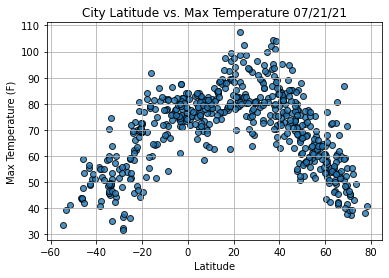

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

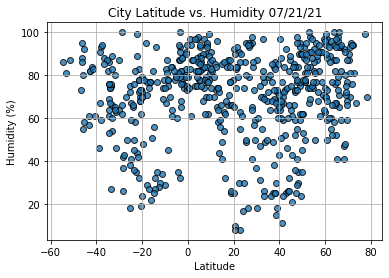

In [21]:
# Build the scatter plot for  vs. max temperature.
plt.scatter(lats,
            humidity, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

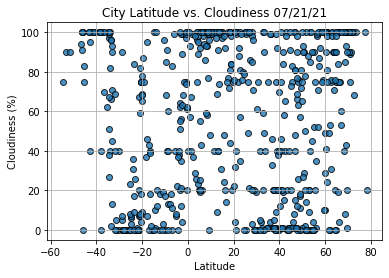

In [22]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

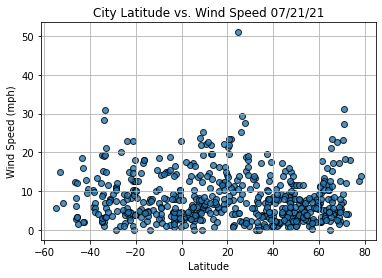

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed, 
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                       Marawi
Country                        PH
Date          2021-07-21 21:36:37
Lat                        7.9986
Lng                      124.2928
Max Temp                    70.65
Humidity                       90
Cloudiness                    100
Wind Speed                   5.97
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4       True
       ...  
566     True
567     True
568     True
569     True
570     True
Name: Lat, Length: 571, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2021-07-21 21:36:31,5.4112,100.3354,82.89,89,20,2.30
1,Norman Wells,CA,2021-07-21 21:36:32,65.2820,-126.8329,80.64,41,75,8.05
3,Aden,YE,2021-07-21 21:34:30,12.7794,45.0367,84.74,65,9,21.88
4,Pacific Grove,US,2021-07-21 21:36:33,36.6177,-121.9166,93.15,77,1,7.00
5,Taoudenni,ML,2021-07-21 21:36:33,22.6783,-3.9836,107.40,8,81,7.67
...,...,...,...,...,...,...,...,...,...
566,Yantal,RU,2021-07-21 21:40:31,56.8471,105.2542,59.94,91,52,1.70
567,Krasnorechenskiy,RU,2021-07-21 21:40:32,44.6265,135.3532,73.87,89,91,2.59
568,Olafsvik,IS,2021-07-21 21:40:32,64.8945,-23.7142,53.17,93,98,12.50
569,Trincomalee,LK,2021-07-21 21:40:33,8.5711,81.2335,81.41,77,100,21.97


In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Georgetown,MY,2021-07-21 21:36:31,5.4112,100.3354,82.89,89,20,2.30
1,Norman Wells,CA,2021-07-21 21:36:32,65.2820,-126.8329,80.64,41,75,8.05
3,Aden,YE,2021-07-21 21:34:30,12.7794,45.0367,84.74,65,9,21.88
4,Pacific Grove,US,2021-07-21 21:36:33,36.6177,-121.9166,93.15,77,1,7.00
5,Taoudenni,ML,2021-07-21 21:36:33,22.6783,-3.9836,107.40,8,81,7.67


In [31]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

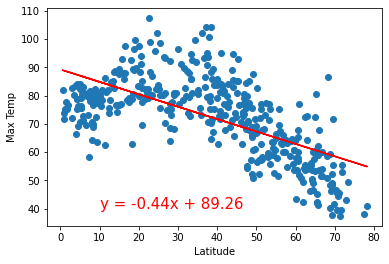

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

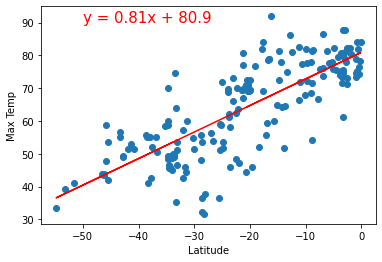

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


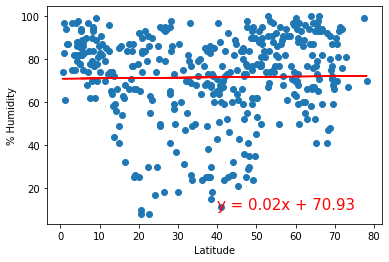

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


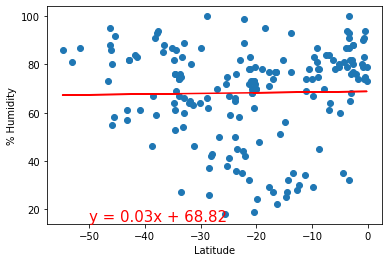

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \
                        for % Humidity", '% Humidity',(-50,15))


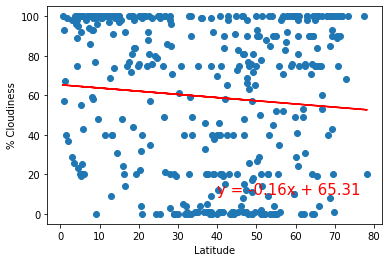

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudines', '% Cloudiness',(40,10))



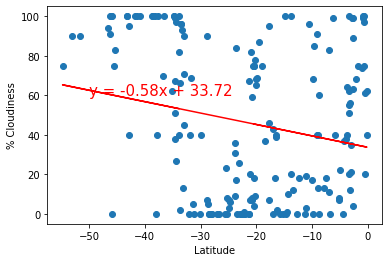

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


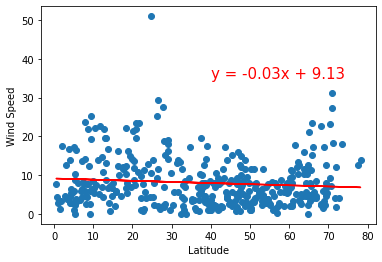

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

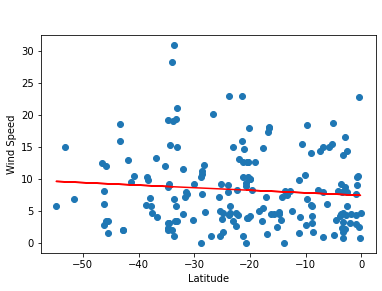

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))